In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import sklearn.metrics as metrics
%config InlineBackend.figure_format='retina'
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV,RidgeCV,Lasso,Ridge

In [2]:
improve_df=pd.read_csv('../data/improved_model_clean_train_data.csv')

In [3]:
pd.options.display.max_columns = 100

In [4]:
display(improve_df)

,lot_area,overall_qual,year_remod_add,exter_qual,mas_vnr_area,bsmt_qual,bsmtfin_type_1,bsmtfin_sf_1,total_bsmt_sf,electrical,gr_liv_area,full_bath,half_bath,bedroom_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,mo_sold,saleprice,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,...,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_1,garage_type_2,garage_type_3,garage_type_4,garage_type_5,garage_type_6,gar_bsm_fir
0,13517,6,2005,3,289.0,3,6,533.0,725.0,4,1479,2,1,3,6,0,2.0,475.0,3,130500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1008.0
1,11492,7,1997,3,132.0,4,6,637.0,913.0,4,2122,2,1,4,8,1,2.0,559.0,4,220000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1197.0
2,7922,5,2007,2,0.0,3,6,731.0,1057.0,4,1057,1,0,3,5,0,1.0,246.0,1,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,977.0
3,9802,5,2007,2,0.0,4,1,0.0,384.0,4,1444,2,1,3,7,0,2.0,400.0,4,174000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,400.0
4,14235,6,1993,2,0.0,2,1,0.0,676.0,4,1445,2,0,3,6,0,2.0,484.0,3,138500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,11449,8,2007,3,0.0,4,6,1011.0,1884.0,4,1728,2,0,3,7,1,2.0,520.0,1,298751,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1532.0
2035,12342,4,1950,2,0.0,3,4,262.0,861.0,4,861,1,0,1,4,0,2.0,539.0,3,82500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,801.0
2036,7558,6,1950,2,0.0,3,1,0.0,896.0,4,1913,1,1,3,9,1,2.0,342.0,3,177000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,343.0
2037,10400,4,195

In [5]:
improve_df.shape

(2039, 123)

## Create X and y variables

In [6]:
train_X=improve_df.drop(['saleprice'], axis=1)
train_y=improve_df['saleprice']

## Create the training and test data

In [7]:
train_X_train,train_X_test,train_y_train,train_y_test=train_test_split(train_X,train_y,test_size=0.2)

## Scaling

In [8]:
sc=StandardScaler()
train_Z=sc.fit_transform(train_X)
train_Z_train=sc.transform(train_X_train)
train_Z_test=sc.transform(train_X_test)

## Instantiate models

In [9]:
lr=LinearRegression()
lassocv=LassoCV()
ridgecv=RidgeCV()
lasso=Lasso()
ridge=Ridge()
#Ridge = Linear least squares with l2 regularization.
#RidgeCV = Ridge regression with built-in cross-validation.

## Train the model

In [10]:
lr.fit(train_Z_train,train_y_train)
lassocv.fit(train_Z_train,train_y_train)
ridgecv.fit(train_Z_train,train_y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

## Socre different model

In [11]:
print(f'LinearRegression Score(train):{cross_val_score(lr,train_Z_train,train_y_train).mean()}')
y_pred_lr=lr.predict(train_Z_test)
print(f'LinearRegression Score(test):{(mean_squared_error(train_y_test,y_pred_lr))**(1/2)}')

print(f'LassoCV Score(train): {cross_val_score(lassocv,train_Z_train,train_y_train).mean()}')
y_pred_lassocv=lassocv.predict(train_Z_test)
print(f'LassoCV Score(test): {mean_squared_error(train_y_test,y_pred_lassocv)**(1/2)}')

print(f'RidgeCV Score(train): {cross_val_score(ridgecv,train_Z,train_y).mean()}')
y_pred_ridgecv=ridgecv.predict(train_Z_test)
print(f'RidgeCV Score(test): {mean_squared_error(train_y_test,y_pred_ridgecv)**(1/2)}')

LinearRegression Score(train):-8.271265929506846e+20
LinearRegression Score(test):1651024241514569.8
LassoCV Score(train): 0.8958026977673434
LassoCV Score(test): 28891.051614397278
RidgeCV Score(train): 0.8933302309828622
RidgeCV Score(test): 28812.314946393082


`Looks like I have way better scores on my Lasso and Ridge regression model. I am going to use cross_validate to predict my price, since I used cross_val_score, I want to keep it consistance, I also tried the model.predict, the prediction results are really similiar.`

### Linear Regression

In [12]:
price_lr_predict=cross_validate(lr,train_Z_train,train_y_train,return_estimator=True)
price_lr_predict

{'fit_time': array([0.00997663, 0.00939226, 0.00928736, 0.00880694, 0.00950408]),
 'score_time': array([0.00061011, 0.00042486, 0.0004158 , 0.00051212, 0.00051999]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_score': array([-6.34730845e+20,  8.66139652e-01, -3.50067197e+21, -2.30146647e+17,
         9.06058523e-01])}

### RidgeCV

In [13]:
price_ridge_predict=cross_validate(ridgecv,train_Z_train,train_y_train,return_estimator=True)
price_ridge_predict

{'fit_time': array([0.01366782, 0.01270032, 0.01318288, 0.01365018, 0.01272082]),
 'score_time': array([0.00052714, 0.00053573, 0.00062585, 0.00052381, 0.00042295]),
 'estimator': [RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
  RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
  RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
  RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
  RidgeCV(alphas=array([ 0.1,  1. , 10. ]))],
 'test_score': array([0.89360627, 0.86778133, 0.88755079, 0.88133311, 0.90674696])}

### LassoCV

In [14]:
price_lasso_predict=cross_validate(lassocv,train_Z_train,train_y_train,return_estimator=True)
price_lasso_predict

{'fit_time': array([0.16335011, 0.16714382, 0.15907788, 0.16977572, 0.19454002]),
 'score_time': array([0.00050378, 0.00054789, 0.00041008, 0.00039101, 0.00052404]),
 'estimator': [LassoCV(), LassoCV(), LassoCV(), LassoCV(), LassoCV()],
 'test_score': array([0.9058112 , 0.87422914, 0.88364524, 0.90195745, 0.91337046])}

## Get the id column from test.csv

In [15]:
test=pd.read_csv('../data/test.csv')

In [16]:
id_column=test[['Id']].copy()

In [17]:
id_column.head()

,Id
0,2658
1,2718
2,2414
3,1989
4,625


## read the test.csv and predict

In [18]:
test_df=pd.read_csv('../data/imporved_model_clean_test_data.csv')

In [19]:
test_df.shape

(878, 123)

In [20]:
test_X=test_df.drop(['yr_sold'],axis=1)

In [21]:
test_Z=sc.fit_transform(test_X) # scaling

### Predict on lassocv

In [22]:
price_lasso_predict['estimator'][0].predict(test_Z)

array([142734.64374351, 165541.30663853, 208205.15031804, 129727.81434293,
       185840.73499507,  89509.92179748, 103720.30590636, 141606.10878527,
       185431.62972936, 169424.35370739, 150538.65479845, 132149.4953954 ,
       152522.4012264 , 262081.98401911, 148591.60532307, 115368.96734998,
       157074.97646348, 124796.22127753, 201627.99911155, 204392.64484659,
       130623.01279199, 127510.61970681, 179353.1254249 , 176616.89951756,
       182906.96274336, 114663.54055011, 137482.6523156 , 129673.30285345,
       152101.40792928,  52768.23188446, 104329.52269905, 107178.78348319,
       209289.9691681 , 163794.91567412, 212470.14882722, 171285.11491536,
       130982.97144028,  59989.94368258, 112334.21483351, 212598.24164553,
       155756.46370969, 210366.39266722, 151272.06990883, 167119.34812965,
       217114.13291738,  88824.62404463, 228026.42496523, 116595.37882096,
       118518.26009762, 131498.56498738, 110167.49086545, 203889.59408757,
       240065.49887999, 1

In [23]:
id_column['saleprice']=price_lasso_predict['estimator'][0].predict(test_Z)

In [24]:
id_column.head()

,Id,saleprice
0,2658,142734.643744
1,2718,165541.306639
2,2414,208205.150318
3,1989,129727.814343
4,625,185840.734995


In [25]:
id_column.to_csv('../data/lassocv_predict.csv',index=False)

### Predict on Ridgecv

In [26]:
price_ridge_predict['estimator'][0].predict(test_Z)

array([136912.31118357, 159111.81181806, 207008.47406682, 127515.47772747,
       184975.19040914,  91436.10803176, 106939.42041371, 147808.48236545,
       177225.05168512, 171199.83811708, 142949.1765273 , 128209.32411913,
       151093.28452545, 261703.34065962, 146421.80463768, 108194.03074803,
       152219.09856131, 125123.53013001, 199383.16553922, 203449.64872521,
       128952.34484198, 130895.34426578, 170647.8522804 , 187460.43341714,
       181961.66000596, 115972.11120498, 131989.23743265, 128760.12258615,
       156453.1924948 ,  66324.73551002, 101868.30853521, 110807.5151079 ,
       194815.4627104 , 166511.21555795, 211600.94594103, 167348.63332041,
       126638.19856144,  57463.21734484, 110022.67664707, 217746.91838583,
       148597.66164154, 206667.10525533, 154781.23148417, 148656.1085001 ,
       209353.11653839,  94202.49909358, 225981.06299836, 115064.99743822,
       119960.3335316 , 130797.73452338, 108016.34575317, 207592.47448662,
       242254.47755846, 1

In [27]:
id_column_ridgecv=test[['Id']].copy()

In [28]:
id_column_ridgecv['saleprice']=price_ridge_predict['estimator'][0].predict(test_Z)

In [29]:
id_column_ridgecv.to_csv('../data/ridgecv_predict.csv',index=False)

### I am going to do some data exploring here, with the model I just build

In [30]:
ridgecv_coef=pd.DataFrame(list(zip(test_X.columns, ridgecv.coef_)),columns=['features','coef'])
ridgecv_coef_df=ridgecv_coef.sort_values(by='coef',ascending=False)
ridgecv_coef_df.shape

#Here I create a new DataFrame on the features I used in the model, and each features' 
# coeffients 

(122, 2)

## gar_bsm_fir
this is a interaction feature I create from 3 other features: basement finished area+garage area+firplaces

In [31]:
gar_bsm_fir_df=ridgecv_coef_df.loc[(ridgecv_coef_df['features']=='garage_area')|
                    (ridgecv_coef_df['features']=='bsmtfin_sf_1')|
                    (ridgecv_coef_df['features']=='fireplaces')|
                    (ridgecv_coef_df['features']=='gar_bsm_fir'), :]

In [32]:
gar_bsm_fir_df

,features,coef
7,bsmtfin_sf_1,6491.082200
121,gar_bsm_fir,5990.393428
15,fireplaces,2683.395638
17,garage_area,1932.444751


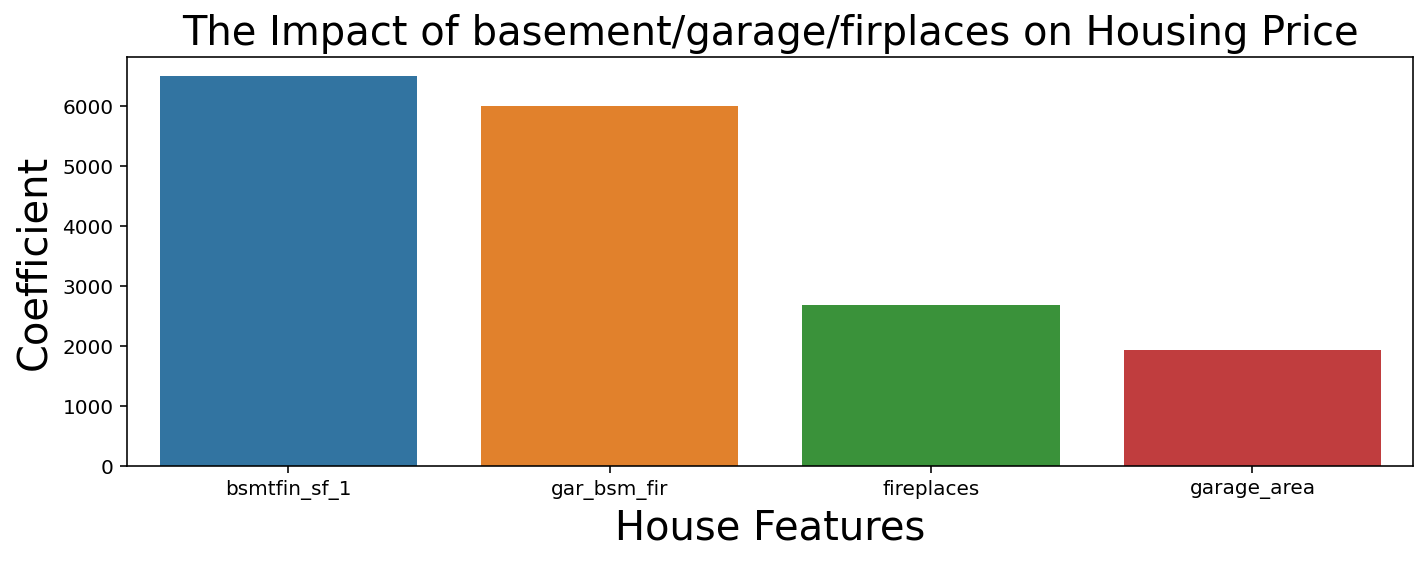

In [33]:
plt.figure(figsize=(10,4))

#sns.set_theme(style="ticks")

sns.barplot(data=gar_bsm_fir_df,y=gar_bsm_fir_df.coef,x=gar_bsm_fir_df.features);
sns.cubehelix_palette(start=1, rot=-1, as_cmap=True)

plt.xlabel("House Features",size=20)
plt.ylabel("Coefficient",size=20)
plt.title('The Impact of basement/garage/firplaces on Housing Price',size=20);
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/the-impace-of-basement-garage-firplaces-on-housing-price');

`Fireplaces have significant less impact on housing price comparing to other features`

## Garage type

In [34]:
gar_typ_df=ridgecv_coef_df[1:7]

In [35]:
gar_typ_df['garage_type']=['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd']


<ipython-input-35-8a7a3d359483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gar_typ_df['garage_type']=['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd']


In [36]:
gar_typ_df

,features,coef,garage_type
1,overall_qual,15888.199529,2Types
8,total_bsmt_sf,8056.428726,Attchd
3,exter_qual,7822.926586,Basment
103,mas_vnr_type_None,6771.456453,BuiltIn
7,bsmtfin_sf_1,6491.082200,CarPort
4,mas_vnr_area,6256.890128,Detchd


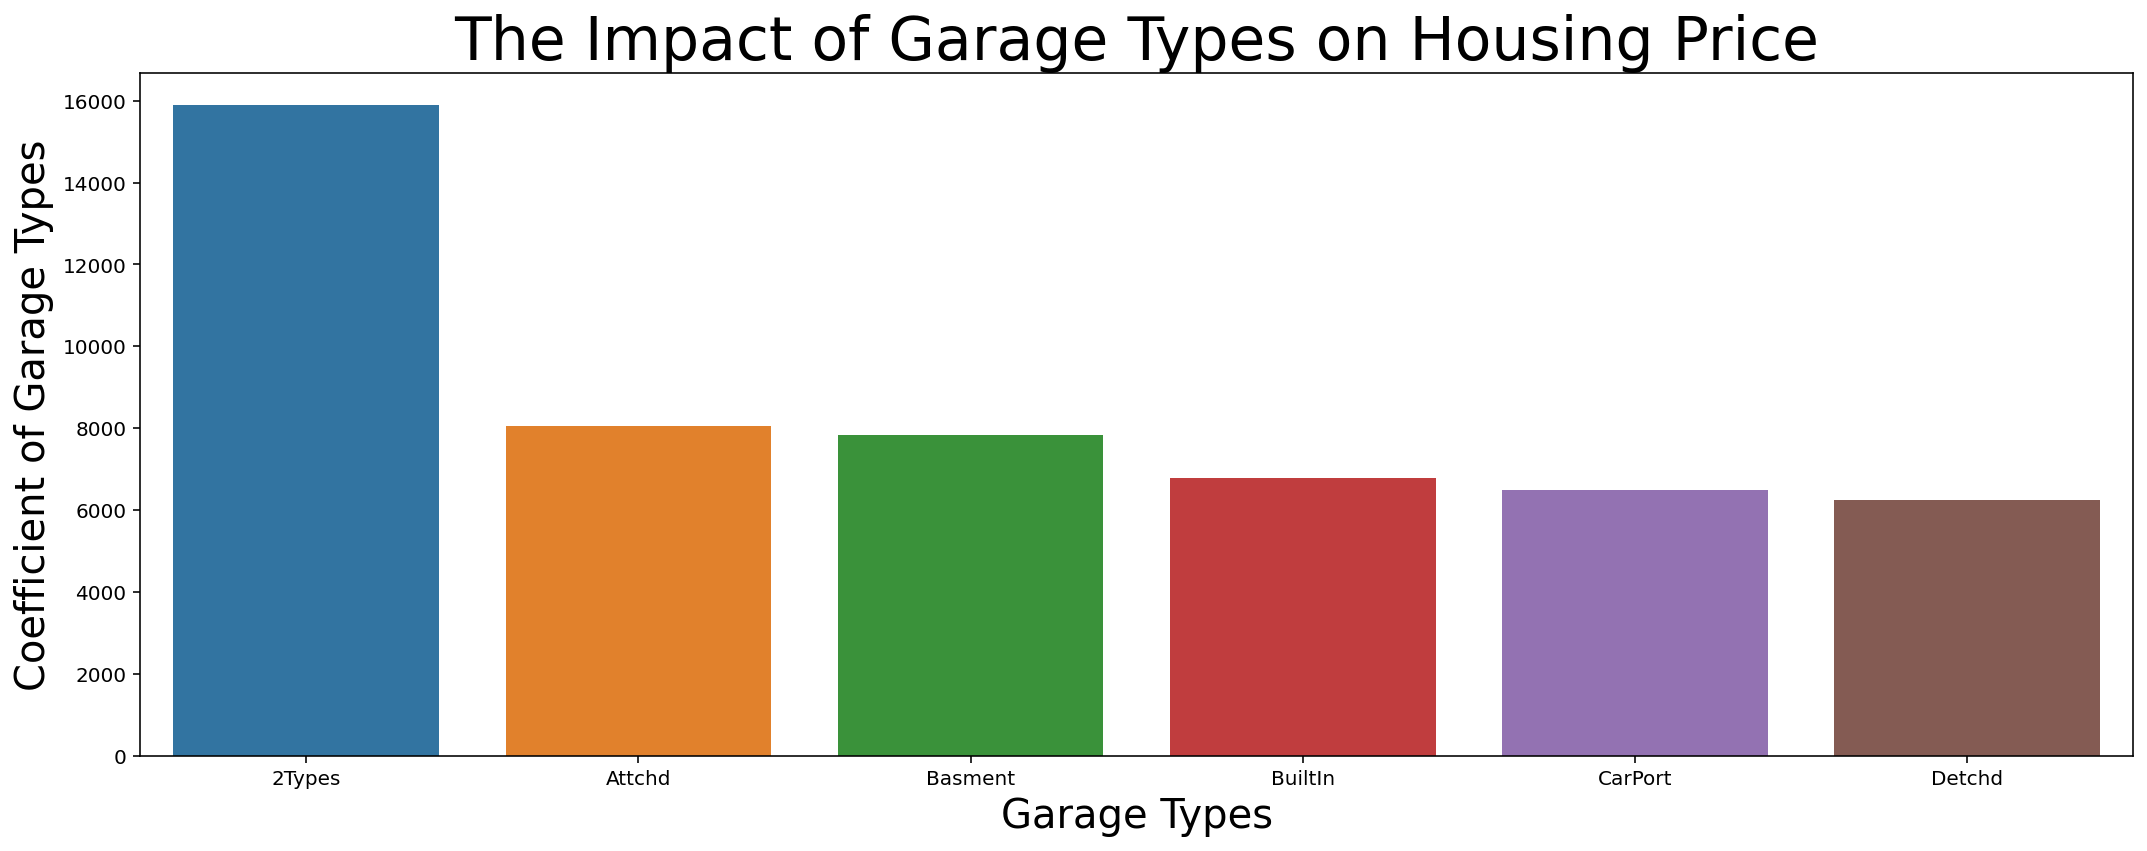

In [37]:
plt.figure(figsize=(15,6))

#sns.set_theme(style="ticks")

sns.barplot(data=gar_typ_df,y=gar_typ_df.coef,x=gar_typ_df.garage_type);
sns.cubehelix_palette(start=1, rot=-1, as_cmap=True)

plt.xlabel("Garage Types",size=20)
plt.ylabel("Coefficient of Garage Types",size=20)
plt.title('The Impact of Garage Types on Housing Price',size=30);
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/the-impace-of-garage-types-on-housing-price');

`Houses with more than two types of garage has almost twice positive impact on housing price compare to houses with other types of garage`

## Neighborhood

In [38]:
ridgecv_coef[41:68]

,features,coef
41,neighborhood_Blueste,-300.631548
42,neighborhood_BrDale,587.448030
43,neighborhood_BrkSide,-2280.796807
44,neighborhood_ClearCr,-1565.895032
45,neighborhood_CollgCr,-3983.984152
46,neighborhood_Crawfor,-1300.555785
47,neighborhood_Edwards,-4570.333250
48,neighborhood_Gilbert,-4017.211877
49,neighborhood_Greens,300.119934
50,neighborhood_GrnHill,3111.119627


In [39]:
neibe_df=ridgecv_coef[41:68]
neibe_df['features']=neibe_df['features'].str.replace('neighborhood_','')

<ipython-input-39-c38af72305de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neibe_df['features']=neibe_df['features'].str.replace('neighborhood_','')


In [40]:
neibe_sort_df = neibe_df.sort_values(by='coef',ascending=False)
neibe_sort_df 

# I sort the coeffients so I can put them into a chart

,features,coef
59,NridgHt,5477.167921
65,StoneBr,5425.894173
50,GrnHill,3111.119627
56,NPkVill,1325.136372
42,BrDale,587.448030
52,Landmrk,308.588747
49,Greens,300.119934
58,NoRidge,243.753992
64,Somerst,-87.793525
41,Blueste,-300.631548


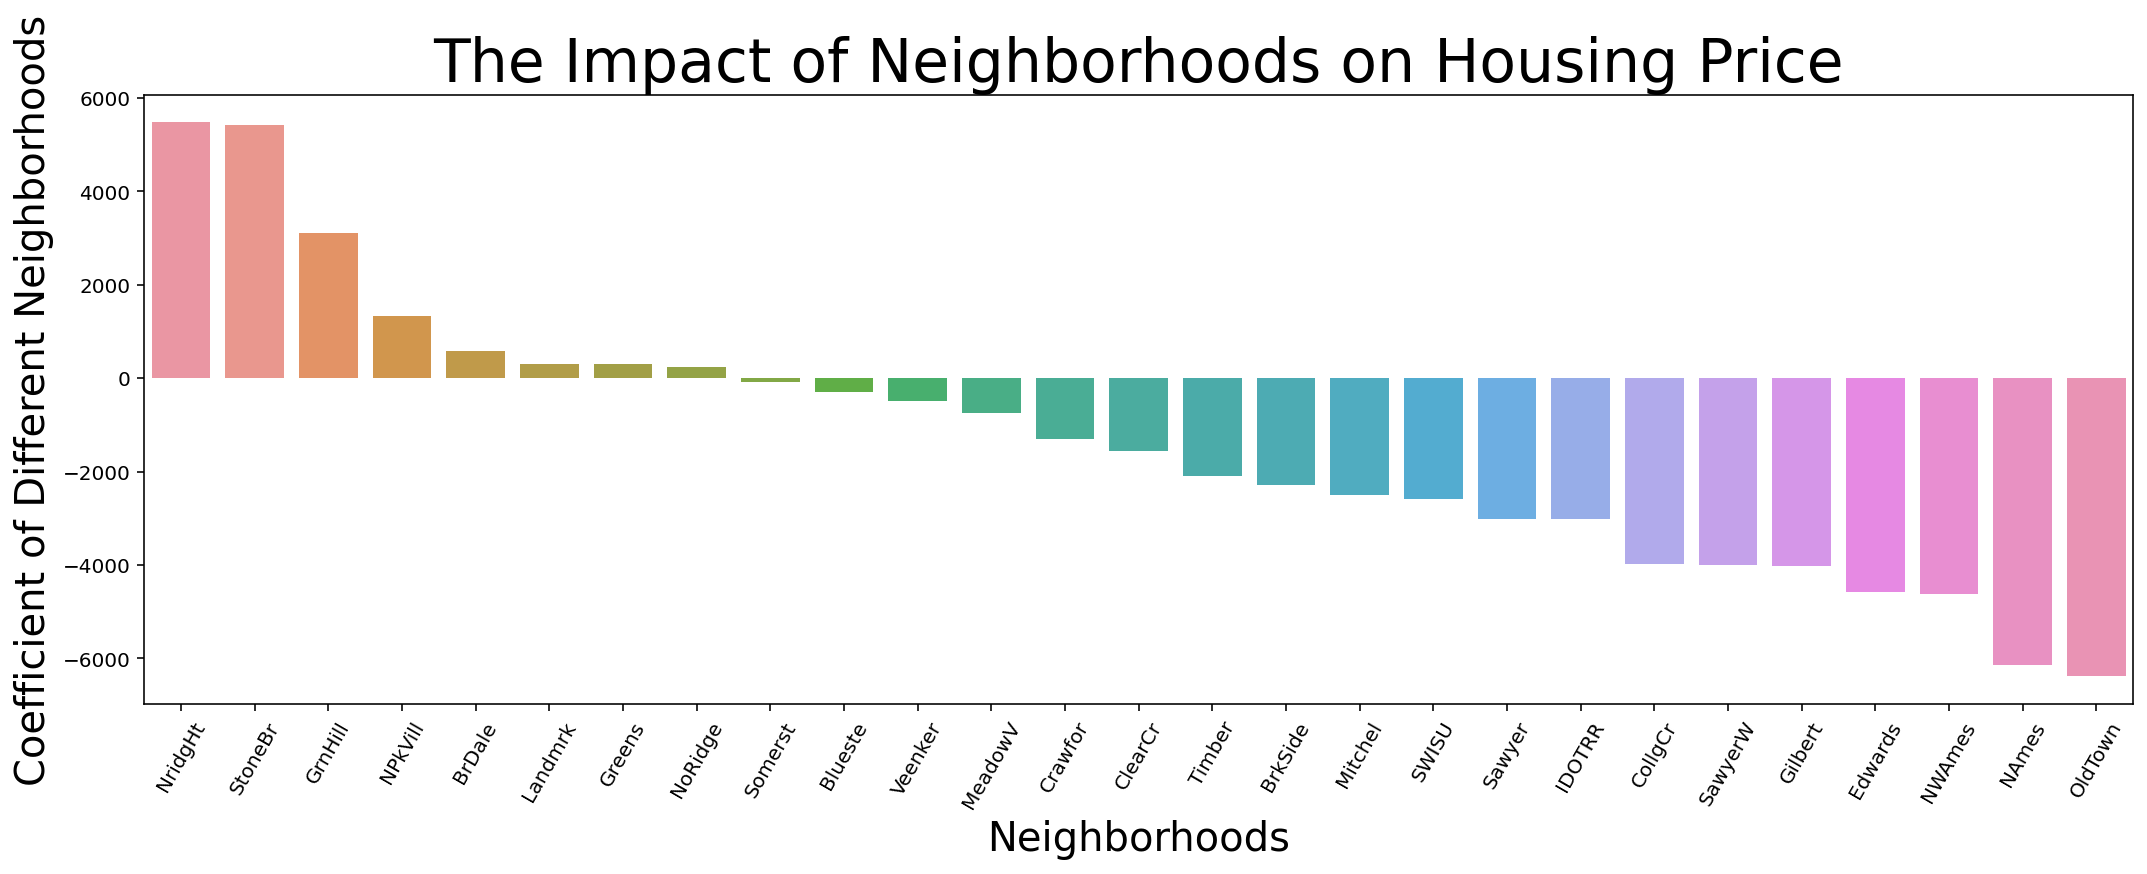

In [41]:
plt.figure(figsize=(15,6))

sns.barplot(data=neibe_sort_df,y=neibe_sort_df.coef,x=neibe_sort_df.features)
sns.cubehelix_palette(start=1, rot=-1, as_cmap=True)

plt.xlabel("Neighborhoods",size=20)
plt.ylabel("Coefficient of Different Neighborhoods",size=20)
plt.title('The Impact of Neighborhoods on Housing Price',size=30);

plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('../plots/the-impact-of-neighborhoods-on-housing-price');

#the neighborhoods rank from the most positive impact to the most negative impact